# Geospatial Data Processing Toolkit

####  The Geospatial Data Processing Toolkit provides a clear and instructive workflow, showcasing effective techniques for acquiring, cleansing, and transforming elevation terrain and satellite imagery data into a format optimised for machine learning applications or in-depth analyses.

##### Imports 

In [1]:
import xarray as xr
import numpy as np
import openeo
import matplotlib.pyplot as plt
import proplot as plot
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

Use OpenEO to download open source Earth Observation data from Copernicus Data Space. <br><br> It is necessary to register at https://dataspace.copernicus.eu/. Follow the instruction provided by _authenticate_oidc()_ function to authenticate this notebook for data retrieving.

In [2]:
backend_url = 'https://openeo.dataspace.copernicus.eu/openeo/1.1'

connection = openeo.connect(backend_url)

In [3]:
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.1' with OidcBearerAuth>

List of the available collection of data

In [26]:
connection.list_collections()

[{'description': 'Sentinel 3 imagery captured by OLCI sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_OLCI_L1B',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 OLCI'},
 {'description': 'Sentinel 3 imagery captured by SLSTR sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_SLSTR',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 SLSTR'},
 {'description': 'Sentinel 5 Precursor imagery captured by TROPOMI sensor.\n\nThis dataset only supports loading one band at a time.',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2018-04-30T00:18:50Z', None]]}},
  'id': 'SENTINEL_5P_L2',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://docs.sentinel-hub.c

We download an example box located in Italy South.

In [4]:
# Specify the bounding box and temporal range
box_name = 'Apulia1'
bbox = {"west": 14, "south": 40.0, "east": 16, "north": 42}

# Create a data cube from the "COPERNICUS_30" collection
datacube = connection.load_collection(
    "COPERNICUS_30",
    spatial_extent=bbox,
)

datacube = datacube.save_result(format='NetCDF')
job = datacube.create_job()

results = job.start_and_wait().get_results()

0:00:00 Job 'j-69010711827c4922a6e5fa1542b0fb89': send 'start'
0:00:11 Job 'j-69010711827c4922a6e5fa1542b0fb89': created (progress N/A)
0:00:18 Job 'j-69010711827c4922a6e5fa1542b0fb89': created (progress N/A)
0:00:24 Job 'j-69010711827c4922a6e5fa1542b0fb89': created (progress N/A)
0:00:32 Job 'j-69010711827c4922a6e5fa1542b0fb89': created (progress N/A)
0:00:42 Job 'j-69010711827c4922a6e5fa1542b0fb89': created (progress N/A)
0:00:55 Job 'j-69010711827c4922a6e5fa1542b0fb89': created (progress N/A)
0:01:10 Job 'j-69010711827c4922a6e5fa1542b0fb89': created (progress N/A)
0:01:31 Job 'j-69010711827c4922a6e5fa1542b0fb89': running (progress N/A)
0:01:56 Job 'j-69010711827c4922a6e5fa1542b0fb89': running (progress N/A)
0:02:26 Job 'j-69010711827c4922a6e5fa1542b0fb89': running (progress N/A)
0:03:04 Job 'j-69010711827c4922a6e5fa1542b0fb89': running (progress N/A)
0:03:51 Job 'j-69010711827c4922a6e5fa1542b0fb89': finished (progress N/A)


In [5]:
results

<JobResults for job 'j-69010711827c4922a6e5fa1542b0fb89'>

In [6]:
# Save file on disk
results.download_file(f'data/DEM_{box_name}.nc')

PosixPath('data/DEM_Apulia1.nc')

Show the preview of the DEM data

In [16]:
ds_dem = xr.open_dataset('data/DEM_Apulia1.nc').max(dim='t')['DEM']

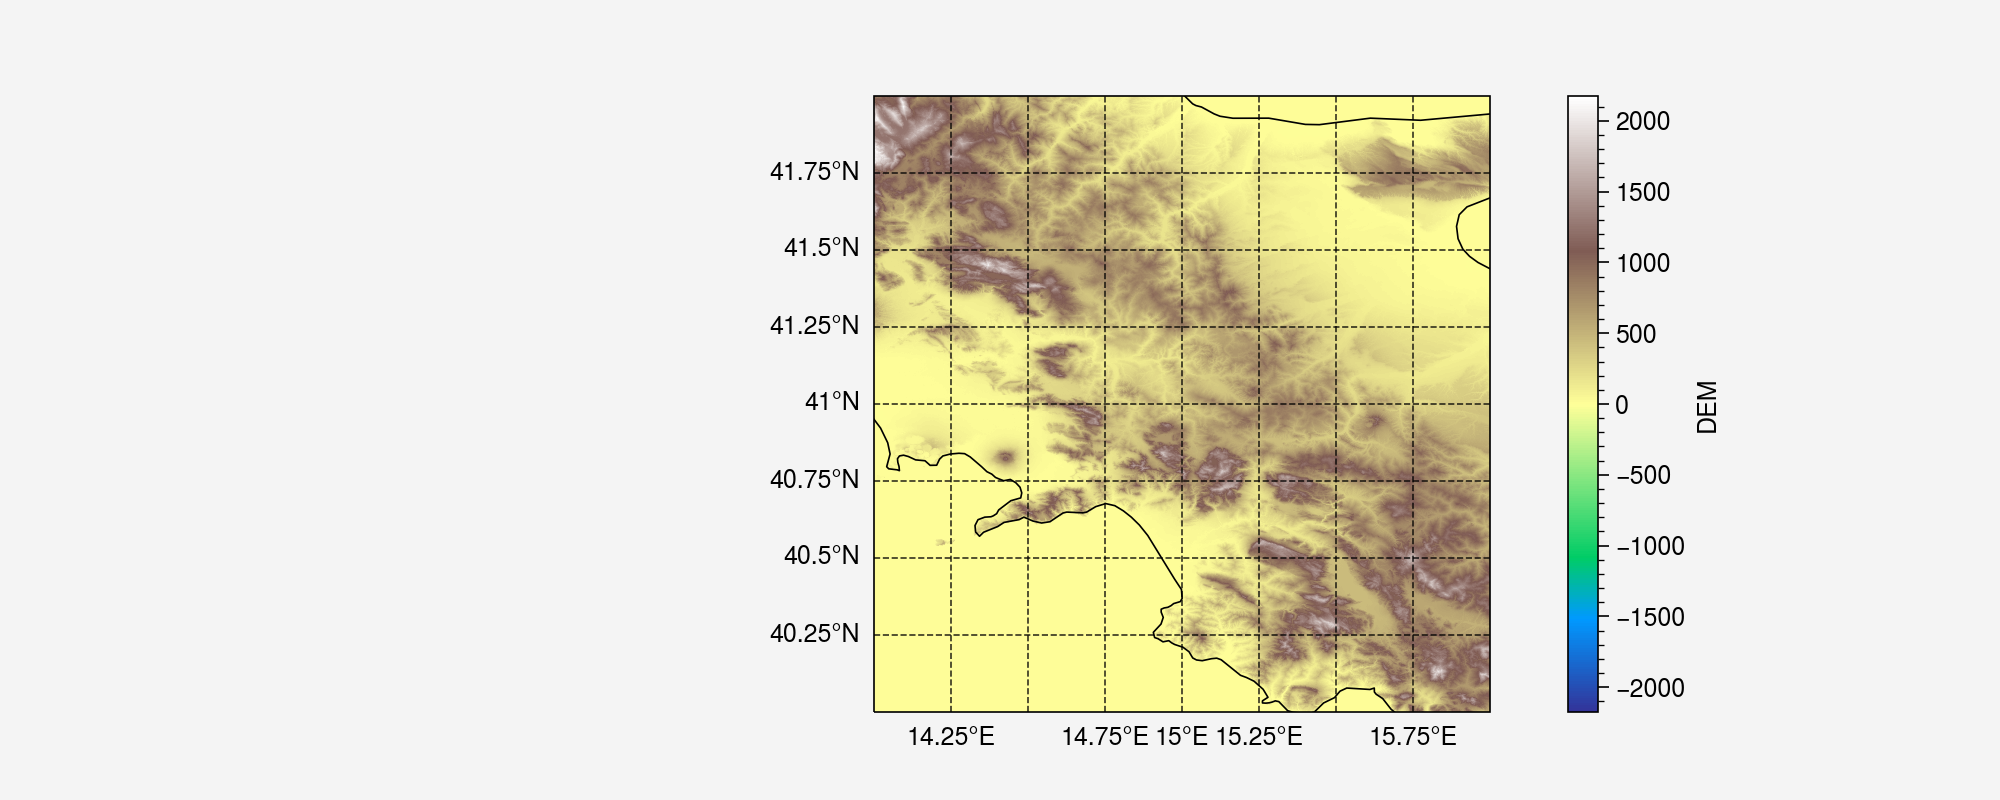

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,4), subplot_kw={'projection': ccrs.PlateCarree()})

cmap = 'terrain'

im = xr.plot.imshow(ds_dem, cmap=cmap, ax = ax)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.BORDERS, edgecolor='black')

gl=ax.gridlines(draw_labels=True, alpha=0.8, linestyle='--')
gl.top_labels = False
gl.right_labels = False

### Compute slope and aspect

Import DEM data and compute slope and aspect. Then save it to the disk.

In [18]:
def calculate_slope(dem, x_res, y_res):
    """
    Calculate the slope from a DEM.

    Parameters:
        dem (xarray.DataArray): The DEM data.
        x_res (float): The resolution of the DEM grid in the X direction.
        y_res (float): The resolution of the DEM grid in the Y direction.

    Returns:
        xarray.DataArray: The slope data.
    """

    # Calculate the gradients in the X and Y directions
    grad_y, grad_x = np.gradient(dem, y_res, x_res)

    # Calculate the slope
    slope = np.arctan(np.sqrt(grad_x**2 + grad_y**2)) * (180 / np.pi)  # Convert to degrees

    return xr.DataArray(slope, coords=[dem.coords['y'], dem.coords['x']], dims=['y', 'x'])

def calculate_aspect(dem, x_res, y_res):
    """
    Calculate the aspect from a DEM.

    Parameters:
        dem (xarray.DataArray): The DEM data.
        x_res (float): The resolution of the DEM grid in the X direction.
        y_res (float): The resolution of the DEM grid in the Y direction.

    Returns:
        xarray.DataArray: The aspect data.
    """

    # Calculate the gradients in the X and Y directions
    grad_y, grad_x = np.gradient(dem, y_res, x_res)

    # Calculate the aspect
    aspect = np.arctan2(-grad_x, grad_y) * (180 / np.pi)  # Convert to degrees

    # Adjust the aspect values to range from 0 to 360
    aspect = np.where(aspect < 0, 360 + aspect, aspect)

    return xr.DataArray(aspect, coords=[dem.coords['y'], dem.coords['x']], dims=['y', 'x'])

def calculate_resolution(coords):
    """
    Calculate the approximate resolution (in meters per pixel) of a DEM.
    
    Parameters:
        coords (dict): The coordinates of the DEM data.
        
    Returns:
        tuple: The resolution in the X direction (longitude) and the Y direction (latitude).
    """
    RADIUS_EARTH = 6371000  # in meters

    # Get the latitude and longitude coordinates
    lat = coords['y'].values
    lon = coords['x'].values

    # Calculate the mean latitude (in radians)
    mean_lat = np.radians(np.mean(lat))

    # Calculate the length of a degree of latitude and longitude in meters
    length_degree_lat = (np.pi * RADIUS_EARTH) / 180
    length_degree_lon = length_degree_lat * np.cos(mean_lat)

    # Calculate the resolution in meters/pixel
    y_res = length_degree_lat * (lat[1] - lat[0])
    x_res = length_degree_lon * (lon[1] - lon[0])

    return x_res, y_res


In [20]:
dem_data = xr.open_dataset('data/DEM_Apulia1.nc').max(dim='t')['DEM']

In [21]:
# Calculate the resolutions
x_res, y_res = calculate_resolution(dem_data.coords)

In [22]:
# Calculate slope and aspect with the updated functions
slope = calculate_slope(dem_data, x_res, y_res)
aspect = calculate_aspect(dem_data, x_res, y_res)

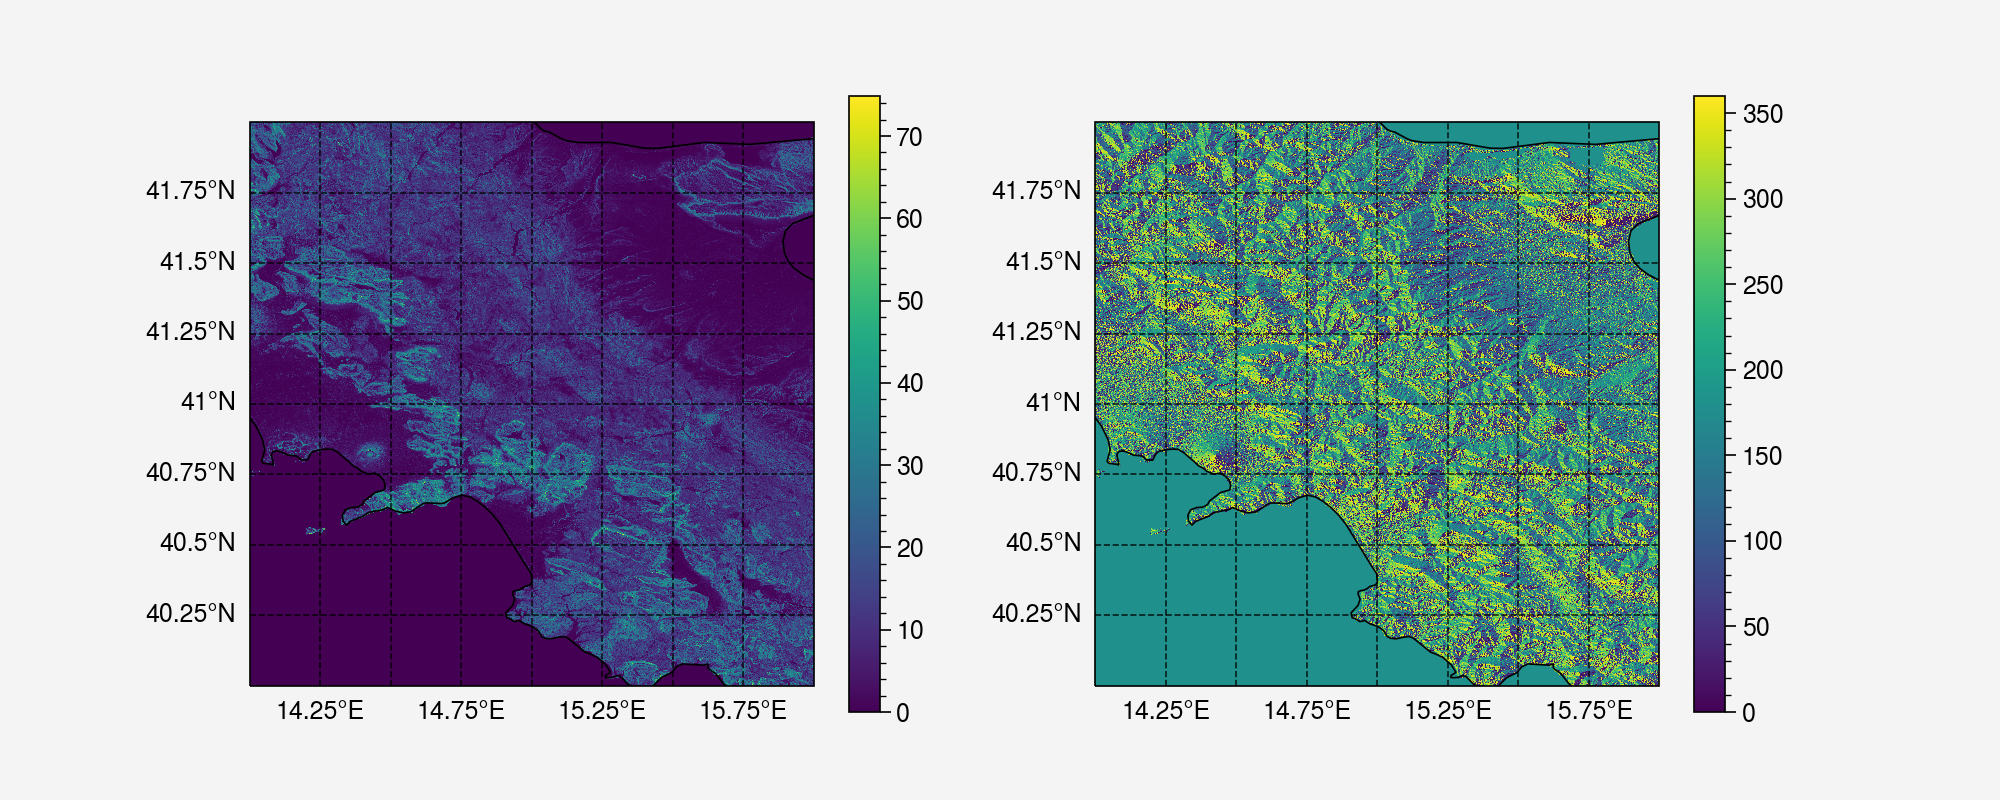

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,4), subplot_kw={'projection': ccrs.PlateCarree()})

cmap = 'viridis'

im = xr.plot.imshow(slope, cmap=cmap, ax = ax[0])
ax[0].add_feature(cfeature.COASTLINE, edgecolor='black')
ax[0].add_feature(cfeature.LAKES, edgecolor='black')
ax[0].add_feature(cfeature.BORDERS, edgecolor='black')

gl=ax[0].gridlines(draw_labels=True, alpha=0.8, linestyle='--')
gl.top_labels = False
gl.right_labels = False

im = xr.plot.imshow(aspect, cmap=cmap, ax = ax[1])
ax[1].add_feature(cfeature.COASTLINE, edgecolor='black')
ax[1].add_feature(cfeature.LAKES, edgecolor='black')
ax[1].add_feature(cfeature.BORDERS, edgecolor='black')

gl=ax[1].gridlines(draw_labels=True, alpha=0.8, linestyle='--')
gl.top_labels = False
gl.right_labels = False

In [23]:
# Save to disk

slope.to_netcdf('data/slope_Apulia1.nc')
aspect.to_netcdf('data/aspect_Apulia1.nc')